In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [757]:
df = pd.read_csv(r"C:\Users\User\Downloads\IDS-SEM-PROJECT\car_price_prediction.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [758]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()
#df['Mileage'].str.replace('km','').astype(int)

,ID,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,2010.91,4.58,6.58
std,936591.42,190581.27,5.67,1.20,4.32
min,20746880.00,1.00,1939.00,1.00,0.00
25%,45698374.00,5331.00,2009.00,4.00,4.00
50%,45772308.00,13172.00,2012.00,4.00,6.00
75%,45802036.00,22075.00,2015.00,4.00,12.00
max,45816654.00,26307500.00,2020.00,16.00,16.00


In [759]:
#__edit columns' names and data types of some columns............
df.columns = df.columns.str.replace(' ', '_')
df['ID'] = df['ID'].astype(str)
df['Levy'] = df['Levy'].astype(str)
df['Levy'] = df['Levy'].str.replace('-','0')
df['Levy'] = df['Levy'].astype(np.int64)
df['Mileage'] = df['Mileage'].str.replace('km','').astype(int)
df['Engine_volume'] = df['Engine_volume'].str.replace('Turbo','').astype(float)

In [760]:
#____________Statistical Calulations _____________
#_______ Here we'll generate a new data frame with basic statistical calculations of some important quantities
indices = ['Price','Levy','Cylinders','Airbags']
stats_df = pd.DataFrame({'Mean':df[indices].mean(),'Median':df[indices].median(),'Mode':df[indices].mode().iloc[0],
                         'Std.Dev.':df[indices].std(),'Variance':df[indices].var(),'Count':df[indices].count(),'0.25':df[indices].quantile(0.25),
                        '0.50':df[indices].quantile(0.50),'0.75':df[indices].quantile(0.75),'Max':df[indices].max(),'Min':df[indices].min().values})
#stats_df

In [761]:
#______Correlation analysis between price, levy, airbags, and cylinders
correlation = df[['Price','Levy','Cylinders','Airbags']].corr()
#correlation

In [762]:
#______Anlaysis of missing values
# here we'll generate a table/data frame for missing values comparison for every column in df
missing_value_df = pd.DataFrame({'Count': len(df),'Missing_valus':df.isnull().sum(),'Percent_missing_values':df.isnull().sum()/len(df)*100})
#missing_value_df

In [763]:
#____Analysis of data types and unique values in columns
# we'll create a new data frame for every column's unique counts
unique_counts_df = pd.DataFrame({'Data_Type':df.dtypes, 'Counts': len(df),'Unique_Counts':df.nunique()})
#unique_counts_df

#### Outlier Detection and Solution
"Here we have one value of price which is very high than mean in whole data set and also in categorical mean...so we'll change it with median value."


In [764]:
mileage_upper_limit = df['Mileage'].quantile(0.996)
mileage_lower_limit = df['Mileage'].quantile(0.04)
mileage_lower_limit

np.float64(1000.0)

In [765]:
df['Mileage'].sort_values( ascending=False).head(50)
df['Mileage'].describe()

count        19237.00
mean       1532235.69
std       48403869.38
min              0.00
25%          70139.00
50%         126000.00
75%         188888.00
max     2147483647.00
Name: Mileage, dtype: float64

In [775]:
med = df['Price'].median()
df.loc[df['Price']>800000,'Price'] = med
df.loc[df['Mileage']>mileage_upper_limit,'Mileage'] = df['Mileage'].quantile(0.95)
df.loc[df['Mileage']<mileage_lower_limit,'Mileage'] = df['Mileage'].quantile(0.04)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa63456e90>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa63457110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa63456d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa63457390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa634574d0>],
 'means': []}

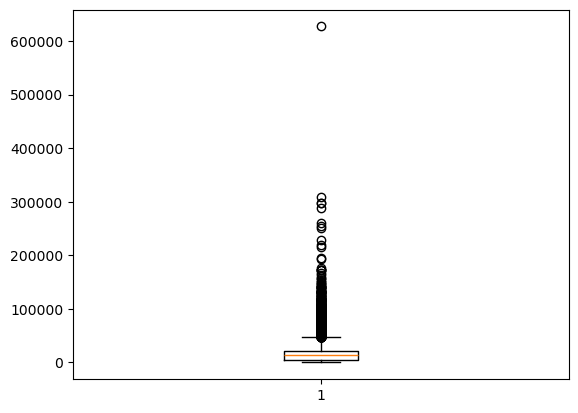

In [767]:
plt.boxplot(df['Price'])

In [778]:
#_____Group Aggregations
#____________Here we'll generate grouped aggregations of all quantities with price___________________
model_price_group = df.groupby('Model')['Price'].agg(['mean','median','std','max','min'])
category_price_group = df.groupby('Category')['Price'].agg(['mean','median','std','max','min','count'])
fuel_price_group = df.groupby('Fuel_type')['Price'].agg(['mean','median','std','max','min','count'])
doors_price_group = df.groupby('Doors')['Price'].agg(['mean','median','std','max','min','count'])
airbags_price_group = df.groupby('Airbags')['Price'].agg(['mean','median','std','max','min','count'])
manufacturer_price_group = df.groupby('Manufacturer')['Price'].agg(['mean','median','std','max','min','count'])
year_price_group = df.groupby('Prod._year')['Price'].agg(['mean','median','std','max','min','count'])
leather_price_group = df.groupby('Leather_interior')['Price'].agg(['mean','median','std','max','min','count'])
mileage_price_group = df.groupby('Mileage')['Price'].agg(['mean','median','std','max','min','count'])
color_price_group = df.groupby('Color')['Price'].agg(['mean','median','std','max','min','count'])
drivewheels_price_group = df.groupby('Drive_wheels')['Price'].agg(['mean','median','std','max','min','count'])
gearbox_price_group = df.groupby('Gear_box_type')['Price'].agg(['mean','median','std','max','min','count'])
cylinder_price_group = df.groupby('Cylinders')['Price'].agg(['mean','median','std','max','min','count'])
wheel_price_group = df.groupby('Wheel')['Price'].agg(['mean','median','std','max','min','count'])
enginevolume_price_group = df.groupby('Engine_volume')['Price'].agg(['mean','median','std','max','min','count'])
mileage_price_group

,mean,median,std,max,min,count
Mileage,,,,,,
1000,10225.66,5959.00,25424.51,627220,30,848
1036,73131.00,73131.00,NaN,73131,73131,1
1040,48296.00,48296.00,NaN,48296,48296,1
1111,7429.71,7840.00,4561.87,16308,1000,17
1123,100.00,100.00,NaN,100,100,1
...,...,...,...,...,...,...
960000,35438.00,35438.00,0.00,35438,35438,2
970000,10349.00,10349.00,NaN,10349,10349,1
980087,5500.00,5500.00,NaN,5500,5500,1


In [769]:
upperlimit = df['Price'].quantile(0.95)

“95% of cars are priced below 49,495. The histogram focuses on this range to clearly visualize the distribution of typical cars. Cars priced above 49,495 are rare luxury vehicles and are considered outliers for analysis and ML modeling purposes.”

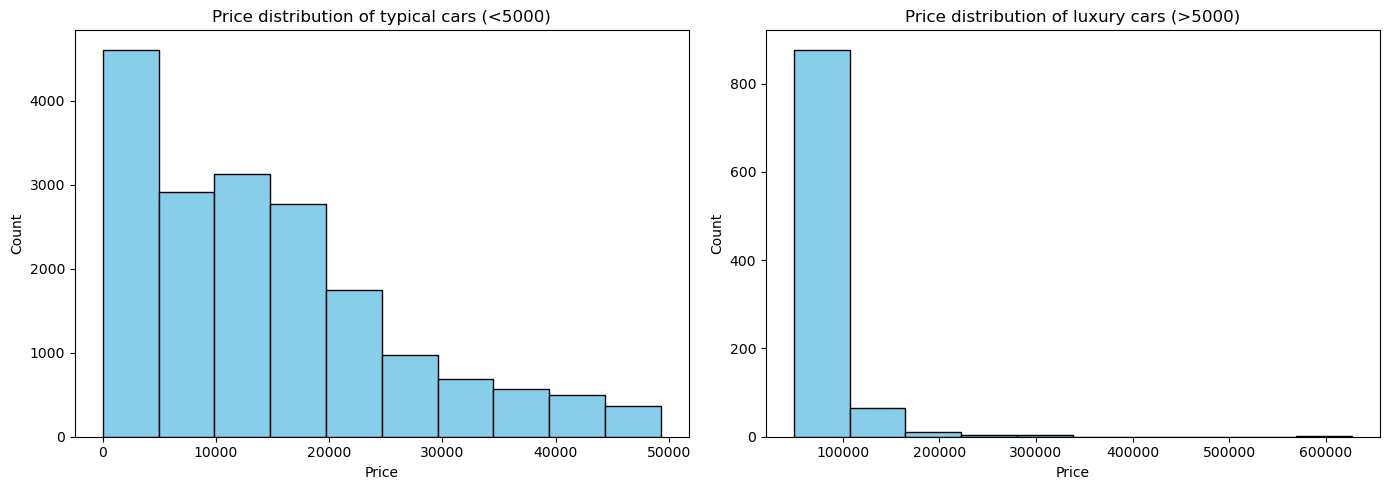

In [770]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].hist(df['Price'][df['Price']<=upperlimit],bins=10,edgecolor='black',color='skyblue')
ax[0].set_title('Price distribution of typical cars (<5000)')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Count')
ax[1].hist(df['Price'][df['Price']>upperlimit],bins=10,edgecolor='black',color='skyblue')
ax[1].set_title('Price distribution of luxury cars (>5000)')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Count') 
plt.tight_layout()
#plt.show()

Text(0, 0.5, 'Mean Price')

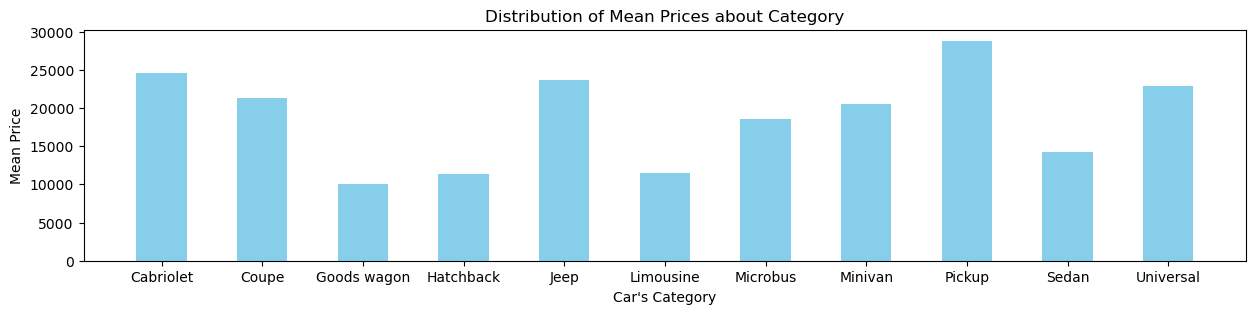

In [771]:
fig, ax1 = plt.subplots(figsize=(15,3))
ax1.bar(category_price_group.index,category_price_group['mean'],color='skyblue',width=0.5)
ax1.set_title('Distribution of Mean Prices about Category')
ax1.set_xlabel('Car\'s Category')
ax1.set_ylabel('Mean Price')

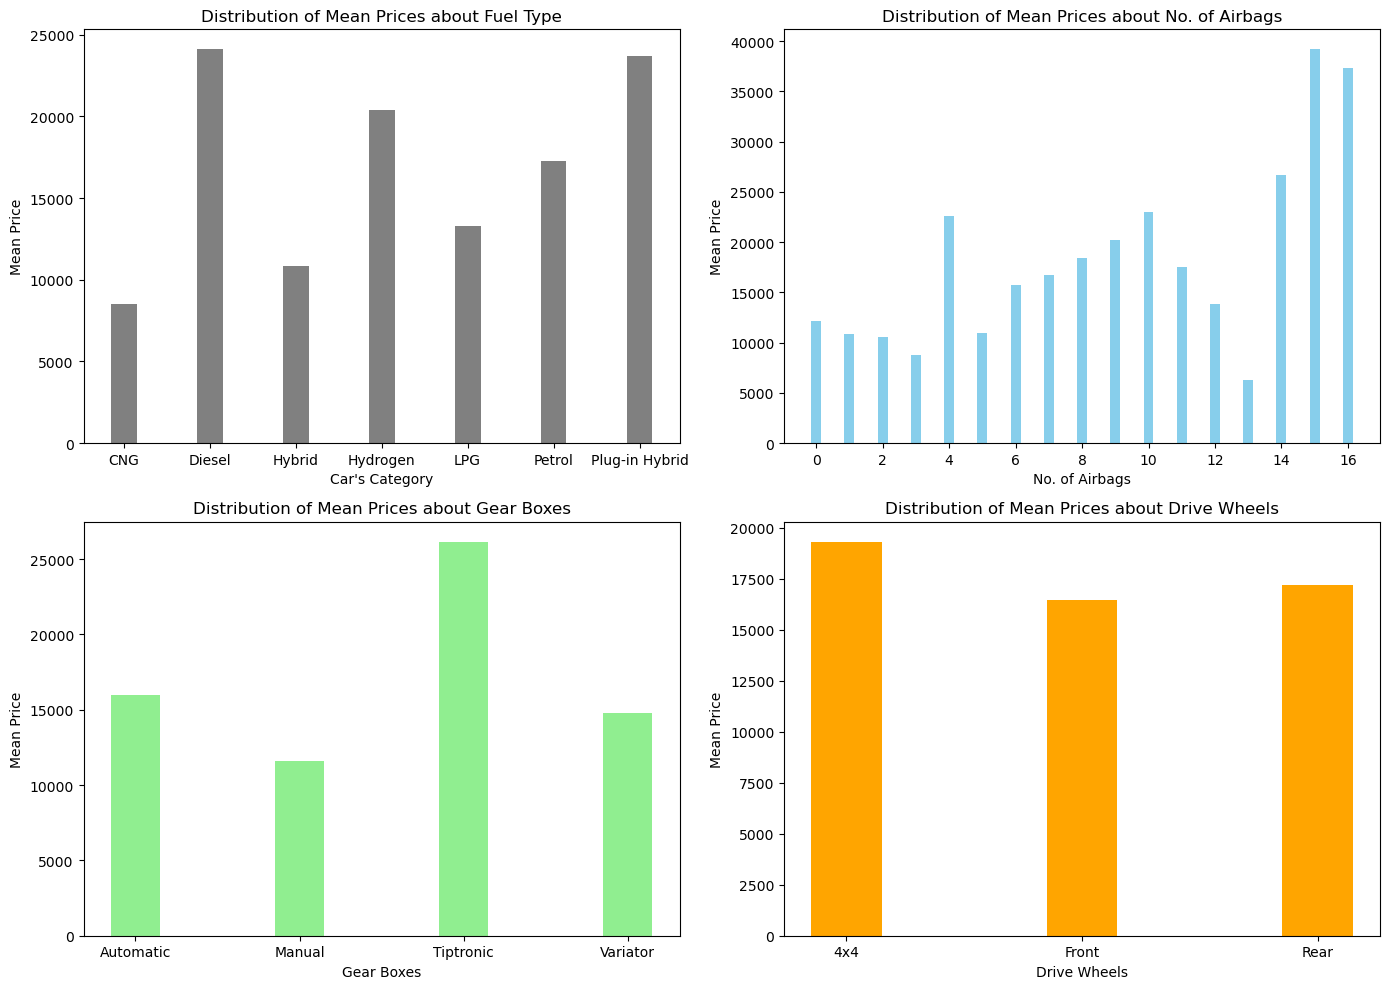

In [772]:
fig, ax2 = plt.subplots(2,2,figsize=(14,10))
ax2 = ax2.flatten()
ax2[0].bar(fuel_price_group.index,fuel_price_group['mean'],color='grey',width=0.3)
ax2[0].set_title('Distribution of Mean Prices about Fuel Type')
ax2[0].set_xlabel('Car\'s Category')
ax2[0].set_ylabel('Mean Price')
ax2[1].bar(airbags_price_group.index,airbags_price_group['mean'],color='skyblue',width=0.3)
ax2[1].set_title('Distribution of Mean Prices about No. of Airbags')
ax2[1].set_xlabel('No. of Airbags')
ax2[1].set_ylabel('Mean Price')
ax2[2].bar(gearbox_price_group.index,gearbox_price_group['mean'],color='lightgreen',width=0.3)
ax2[2].set_title('Distribution of Mean Prices about Gear Boxes')
ax2[2].set_xlabel('Gear Boxes')
ax2[2].set_ylabel('Mean Price')
ax2[3].bar(drivewheels_price_group.index,drivewheels_price_group['mean'],color='orange',width=0.3)
ax2[3].set_title('Distribution of Mean Prices about Drive Wheels')
ax2[3].set_xlabel('Drive Wheels')
ax2[3].set_ylabel('Mean Price')

plt.tight_layout()

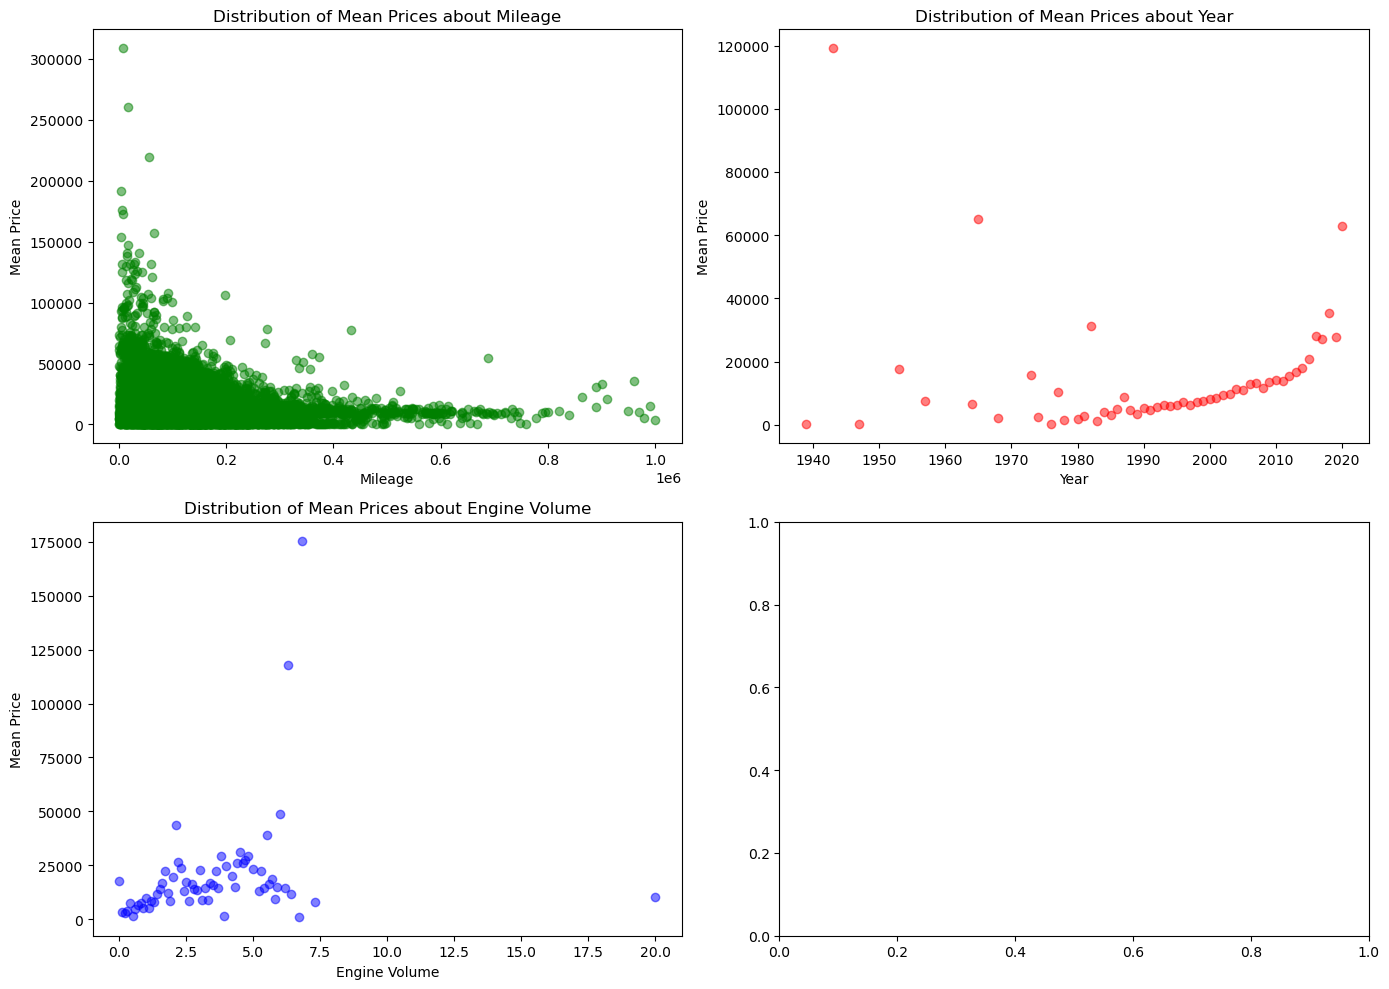

In [779]:
#mileage_price_group= mileage_price_group.sample(1000)
fig, ax3 = plt.subplots(2,2,figsize=(14,10))
ax3 = ax3.flatten()
ax3[0].scatter(x=mileage_price_group.index,y=mileage_price_group['mean'],c='green',marker='o',alpha=0.5)
ax3[0].set_title('Distribution of Mean Prices about Mileage')
ax3[0].set_xlabel('Mileage')
ax3[0].set_ylabel('Mean Price')
ax3[1].scatter(x=year_price_group.index,y=year_price_group['mean'],c='red',marker='o',alpha=0.5)
ax3[1].set_title('Distribution of Mean Prices about Year')
ax3[1].set_xlabel('Year')
ax3[1].set_ylabel('Mean Price')
ax3[2].scatter(x=enginevolume_price_group.index,y=enginevolume_price_group['mean'],c='blue',marker='o',alpha=0.5)
ax3[2].set_title('Distribution of Mean Prices about Engine Volume')
ax3[2].set_xlabel('Engine Volume')
ax3[2].set_ylabel('Mean Price')
plt.tight_layout()